# Perceptrons

#### *variationalform* <https://variationalform.github.io/>

#### *Just Enough: progress at pace*

<https://variationalform.github.io/>

<https://github.com/variationalform>

Simon Shaw
<https://www.brunel.ac.uk/people/simon-shaw>.


<table>
<tr>
<td>
<img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" style="height:18px"/>
</td>
<td>

<p>
This work is licensed under CC BY-SA 4.0 (Attribution-ShareAlike 4.0 International)

<p>
Visit <a href="http://creativecommons.org/licenses/by-sa/4.0/">http://creativecommons.org/licenses/by-sa/4.0/</a> to see the terms.
</td>
</tr>
</table>

<table>
<tr>
<td>This document uses python</td>
<td>
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" style="height:30px"/>
</td>
<td>and also makes use of LaTeX </td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/LaTeX_logo.svg/320px-LaTeX_logo.svg.png" style="height:30px"/>
</td>
<td>in Markdown</td> 
<td>
<img src="https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png" style="height:30px"/>
</td>
</tr>
</table>

## What this is about:


The perceptron

- weighted inputs
- activation thresholds and outputs
- decision boundaries
- multi-layer perceptrons
- feed-forward artificial neural network

As usual our emphasis will be on *doing* rather than *proving*:
*just enough: progress at pace*

### Assigned Reading

For this material you are recommended Chapter 3 of [UDL], 
then Chapter 3 of [NND], and Chapter 6 of [MLFCES], 

- UDL: Understanding Deep Learning, by Simon J.D. Prince. PDF draft available here:
<https://udlbook.github.io/udlbook/>
- NND: Neural Network Design by Martin T. Hagan, Howard B. Demuth, Mark Hudson Beale, Orlando De Jesús. <https://hagan.okstate.edu/nnd.html> and <https://hagan.okstate.edu/NNDesign.pdf>
- MLFCES: Machine Learning: A First Course for Engineers and Scientists, by Andreas Lindholm,
  Niklas Wahlström, Fredrik Lindsten, Thomas B. Schön. Cambridge University Press. 
  <http://smlbook.org>.

These can be accessed legally and without cost.

There are also these useful references for coding:

- PT: `python`: <https://docs.python.org/3/tutorial>
- NP: `numpy`: <https://numpy.org/doc/stable/user/quickstart.html>
- MPL: `matplotlib`: <https://matplotlib.org>

## Context

In the last two sessions we moved from classification to regression and then
we moved back to classification again.

We have focussed on cases where the data is **linearly separable**. This important
property allowed us to use **logistic regression** and **support vector machines** to
construct **linear decision boundaries**.

In this session we will continue to work with linear decision boundaries and
investigate the **perceptron** and **feed forward neural networks**.

The main purpose of this session is to get insight into how perceptrons
can **carve up high dimensional space** with hyperplanes, thus creating many 
compartments within which data classes can be isolated.
This will set us up nicely for our study of **deep neural networks**.

### The Percepton - and a Shallow Neural Network

A perceptron is a computing unit that accepts a vector of numerical inputs,
$\boldsymbol{x}$, and forms a linear combination of them using a vector of
**weights**, $\boldsymbol{W}$, a numerical bias, $b$, may then be added to
form a real number. 

This real number is then **thresholded** with an activation function. This
activation function seeks to determine how significant its input signal is
and either kills it or passes it through.

The whole system is an attempt to (very crudely) mimic the neuronal connections
in the brain.

Chapters 2 and 3 of [UDL, Chapter 3] <https://udlbook.github.io/udlbook/> are useful
background reading, but what we do here is self-contained.

Here it is - schematically. The input vector
$\boldsymbol{x}=(x_1,x_2,x_3)^T$, and weights,
$\boldsymbol{W}=(w_1,w_2,w_3)^T$, are **linearly combined**.
An optional bias, $b$, is added and the result, $n$ 
is fed into an activation function,
$\sigma\colon\mathbb{R}\to\mathbb{R}$ to produce the output $y$.

$$
\begin{array}{lr}
\begin{array}{ll}
n & = w_1 x_1 + w_2 x_2 + w_3 x_3 + b, \\
  & = \boldsymbol{W}^T\boldsymbol{x} + b, \\
y & = \sigma(n).
\end{array}
& \qquad\qquad
\begin{array}{rlcll}
x_1 & \boldsymbol{w}&          &             &\\ 
    & \searrow      &          & \sigma(n)   &\\ 
x_2 & \rightarrow   & n\!\!\!\!\!\bigcirc & \longrightarrow & y \\ 
    & \nearrow      & \uparrow &             & \\ 
x_3 &               & b        &             & \\ 
    &               &          &             & \\ 
\end{array}
\end{array}
$$

Compactly: $y = \sigma(\boldsymbol{W}^T\boldsymbol{x} + b)$.
Let's see why this is is so useful - it really comes down the the 
activation function. Without that this isn't such a big deal.

### The Heaviside Unit Step function

This is defined as follows:

$$
\mathcal{H}(x) = \left\{\begin{array}{ll}
1    &\text{if } x > 0; \\
x_2  &\text{if } x = 0; \\
0    &\text{if } x < 0.
\end{array}\right.
$$

It represents a switch being thrown and the output signal moving
from zero to one. The value $x_2$ at the discontinuity is usually
arbitrary. We have included it because `numpy` allows it with this
syntax:


```
np.heaviside(x,x2)
```

We will usually take $x_2=0$. For details see here:
<https://numpy.org/doc/stable/reference/generated/numpy.heaviside.html>

The Heaviside function can be used as an **activation function** - let's see it. 

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib  # a new one, needed below for repmat

In [18]:
x_vals = np.arange(-20, 20.1, 0.1)
y_vals_1 = np.heaviside(x_vals, 0)
y_vals_2 = np.heaviside(x_vals - 5, 0)
y_vals_3 = 2*np.heaviside(x_vals + 8, 0)

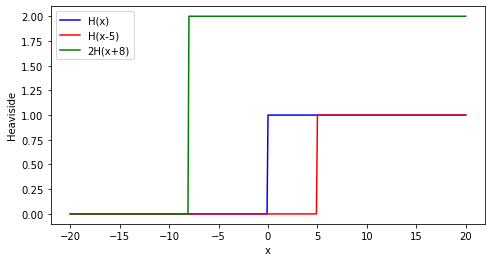

In [19]:
plt.figure(figsize=(10,4)); plt.gca().set_aspect(10)
plt.plot(x_vals, y_vals_1, color='blue', label='H(x)')
plt.plot(x_vals, y_vals_2, color='red', label='H(x-5)')
plt.plot(x_vals, y_vals_3, color='green', label='2H(x+8)')
plt.xlabel('x'); plt.ylabel('Heaviside');
plt.legend()
plt.show()

### A simple feed forward neural net

Let's use ths concrete example: two inputs
$\boldsymbol{x}=(x_1,x_2)^T$, with weights,
$\boldsymbol{W}=(w_1,w_2)^T=(3,2)^T$ and optional bias,
$b=-1$. The activation function is the Heaviside function.

This gives the output,

$$
y = \mathcal{H}(n) \quad\text{ for }\quad
n = \boldsymbol{W}^T\boldsymbol{x}+b
= 3 x_1 + 2 x_2 - 1.
$$

Hence,

$$
y = \left\{\begin{array}{ll}
1    &\text{if } n > 0; \\
0    &\text{if } n \le 0,
\end{array}\right.
\qquad\Longrightarrow\qquad
y = \left\{\begin{array}{ll}
1    &\text{if } 3 x_1 + 2 x_2 - 1 > 0; \\
0    &\text{if } 3 x_1 + 2 x_2 - 1 \le 0.
\end{array}\right.
$$

This can be a **binary classifier**. Can you see why?

We have just seen that with the given weights and bias,

$$
y = \mathcal{H}(n)\text{ for }
n = \boldsymbol{W}^T\boldsymbol{x}+b
= 3 x_1 + 2 x_2 - 1
\ \Rightarrow\ y = \left\{\begin{array}{ll}
1    &\text{if } 3 x_1 + 2 x_2 - 1 > 0; \\
0    &\text{if } 3 x_1 + 2 x_2 - 1 \le 0.
\end{array}\right.
$$

In this $3 x_1 + 2 x_2 - 1 = 0$ represents a straight line in the $(x_1,x_2)$
plane. In the usual '$y=mx+c$' form this line has equation $x_2 = (1-3x_1)/2$ - gradient
$-3/2$ and intercept $1/2$.

A point $(x_1,x_2)=(a,b)$ above this line has $3 x_1 + 2 x_2 - 1 > 0$ while a point
on or below the line has $3 x_1 + 2 x_2 - 1 \le 0$.

Therefore - **this line could be a decision boundary**. Any other line could also,
we would just need different choices for the weights and bias.

Let's set this up and do some calculations with $(x_1,x_2)=(3,1)$ and
$(x_1,x_2)=(-2,-1)$.

$y = \mathcal{H}(n)$ for $\displaystyle n=(3,2){x_1 \choose x_2}-1$...

In [20]:
# set up our column vector of weights, and the bias
W = np.array([[3,2]]).T
b = -1
# find y for input x = (3,1)
X = np.array([[3,1]]).T
y = np.heaviside(W.T@X-b,0)
print('For input x = ( 3, 1), y = ', y)
# find y for input x = (-2,-1)
X = np.array([[-2,-1]]).T
y = np.heaviside(W.T@X-b,0)
print('For input x = (-2,-1), y = ', y)

For input x = ( 3, 1), y =  [[1.]]
For input x = (-2,-1), y =  [[0.]]


We can also illustrate this graphically. We plot the line and 
then the two input points

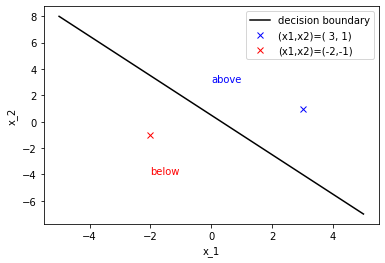

In [21]:
x_vals = np.arange(-5, 5.1)
y_vals = (1-3*x_vals)/2
plt.plot(x_vals, y_vals, color='black', label='decision boundary')
plt.plot( 3, 1, 'x', color='blue',label='(x1,x2)=( 3, 1)')
plt.plot(-2,-1, 'x', color='red', label='(x1,x2)=(-2,-1)')
plt.xlabel('x_1'); plt.ylabel('x_2');
plt.annotate('above', [ 0, 3], color='blue')
plt.annotate('below', [-2,-4], color='red')
plt.legend()

```
X = np.array([[1,1]]).T
y = np.heaviside(W.T@X-b,0)
print('For input x = (1,1), y = ', y)
```

Let's plot the predictions on a grid of equally spaced points in the 
$x_1$ and $x_2$ directions.

If we colour the predictions according to $y=0$ or $y=1$ then this
decision boundary will naturally emerge.

We will create a grid that ranges in both directions over

$$
-7 \le x_1, \ x_2 \le 9 \qquad\text{ in steps of } s=0.5
$$

In [22]:
s = .5
x1 = np.arange(-7, 9+s, s)
x2 = np.arange(-7, 9+s, s)
N = x1.shape[0]

In [23]:
# allocate input and output variables
X = np.zeros([2,1])
y = np.zeros([N,N])
# and our grid points in each direction (note the transpose for x2)
X1grid = np.matlib.repmat(x1,N,1)      # repeats x1 N times
X2grid = np.matlib.repmat(x2,N,1).T

In [24]:

#print(X)
#print(X.shape)
#print(x1[2])
#X[0,0]=x1[2]
#print(X)


In [25]:
# loop over the grid, vertically for each horizontal point
for i in range(N):
  for j in range(N):
    X[0,0] = X1grid[i,j] # x1[i]
    X[1,0] = X2grid[i,j] # x2[j]
    n = W.T @ X + b
    # make a prediction and assign to y_{ij} for x1[i], x2[j]
    tmp = np.heaviside(W.T @ X + b, 0)
    y[i,j] = tmp

In [26]:
# determine the locations where the output is zero
indx = (y < 0.5)
# flatten this matrix into a vector, along with the grid points
indx= indx.flatten()
X1grid = X1grid.flatten()
X2grid = X2grid.flatten()

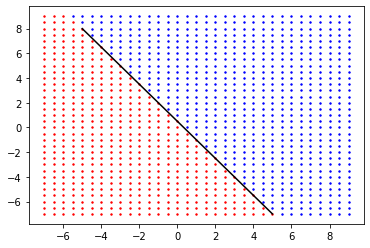

In [27]:
# plot the zero outputs in red
plt.scatter(X1grid[indx], X2grid[indx], 2, color='red')
# and plot the unit outputs in blue
plt.scatter(X1grid[~indx], X2grid[~indx], 2, color='blue')
# plot the decision boubdary from the weights and bias in black
plt.plot(x_vals, y_vals, color='black')

```
#y0 = y.flatten()
#print(y)
#print(y0)
# determine the locations where the output is zero
indx = (y < 0.5)
#indx = (y0 < 0.5)
#indx = indx.reshape([N,N])
#print(indx)
# flatten this matrix into a vector, along with the grid points
indx= indx.flatten()
X1grid = X1grid.flatten()
X2grid = X2grid.flatten()
#print(indx)
#print(X1grid)
#print(X2grid)
# plot the zero outputs in red
plt.scatter(X1grid[indx], X2grid[indx], 2, color='red')
#indx = y0 > 0.5
#indx = (y0 >=0.5).reshape([N,N])
#plt.scatter(X1grid[indx], X2grid[indx], color='blue')
# and plot the unit outputs in blue
plt.scatter(X1grid[~indx], X2grid[~indx], 2, color='blue')
plt.plot(x_vals, y_vals, color='black')
```

Take a breath - this simple idea, using just this,

$$
y = \mathcal{H}(n)\text{ for }
n = \boldsymbol{W}^T\boldsymbol{x}+b
= 3 x_1 + 2 x_2 - 1
\ \Rightarrow\ y = \left\{\begin{array}{ll}
1    &\text{if } 3 x_1 + 2 x_2 - 1 > 0; \\
0    &\text{if } 3 x_1 + 2 x_2 - 1 \le 0.
\end{array}\right.
$$

is the basis of a hugely powerful sub-domain technology in 
data science and artificial intelligence. 

We used this idea to classify the inoput into two classes.

Let's start pushing the boundary (modestly).


### Four Classes

Consider this,

$$
\left(\begin{array}{r}
y_1 \\ y_2
\end{array}\right)
=
\mathcal{H}
\left(
\left(\begin{array}{rr}
1 & 2 \\ -6 & 4
\end{array}\right)^T
\left(\begin{array}{r}
x_1 \\ x_2 
\end{array}\right)
+
\left(\begin{array}{r}
1 \\ 2
\end{array}\right)
\right)
=
\left(\begin{array}{l}
\mathcal{H}(x_1 - 6x_2 + 1)
\\
\mathcal{H}(2 x_1 + 4 x_2 + 2)
\end{array}\right).
$$

Note that the activation function is applied element-by-element.

We can write this in a more generic way as follows:
$\boldsymbol{y} =
\sigma(\boldsymbol{n})$ for
$\boldsymbol{n}=\boldsymbol{W}^T\boldsymbol{x}+\boldsymbol{b}$.

Here we have the matrix of weights
$\boldsymbol{W}={\ \ 1\ \ 2 \choose-6\ \ 4}$
and bias vector $\boldsymbol{b}={1 \choose 2}$.

The possible outputs are:

$$
\boldsymbol{y} =
\left(\begin{array}{r}
0 \\ 0
\end{array}\right), \quad
\left(\begin{array}{r}
1 \\ 0
\end{array}\right), \quad
\left(\begin{array}{r}
0 \\ 1
\end{array}\right) \quad\text{ and }\quad
\left(\begin{array}{r}
1 \\ 1
\end{array}\right).
$$

With this we can consider **four** classes:
$C_1$, $C_2$, $C_3$ and $C_4$.

With 

$$
\left(\begin{array}{r}
y_1 \\ y_2
\end{array}\right)
=
\left(\begin{array}{l}
\mathcal{H}(x_1 - 6x_2 + 1)
\\
\mathcal{H}(2 x_1 + 4 x_2 + 2)
\end{array}\right).
$$

the decision boundaries are given by $x_1 - 6x_2 + 1=0$
and $2 x_1 + 4 x_2 + 2=0$.

This neural network will determine whether or not a given
point is above or below the line $x_1 - 6x_2 + 1=0$ in
the first component of $\boldsymbol{y}$.

And it will determine whether or not that
point is above or below the line $2 x_1 + 4 x_2 + 2=0$ in
the second component of $\boldsymbol{y}$.

It will then decide to which of the four classes the input
belongs.

Let's see a possible classification scheme...

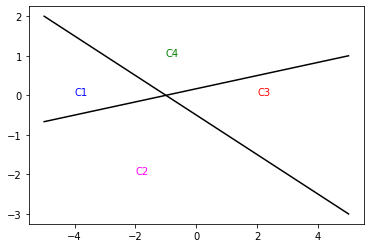

In [28]:
x_vals = np.arange(-5, 5.1)
plt.plot(x_vals,-(1+x_vals)/2, color='black')
plt.plot(x_vals, (1+x_vals)/6, color='black')
plt.annotate('C1', [-4, 0], color='blue')
plt.annotate('C2', [-2,-2], color='magenta')
plt.annotate('C3', [ 2,0], color='red')
plt.annotate('C4', [-1, 1], color='green');

Let's make predictions on a background grid just as before. By coloring 
each prediction according to the four-way scheme above we will see the 
four classes and the separating decision boundaries naurally emerge.

We will create a grid for $-20 \le x_1, x_2 \le 20$ in unit steps.

In [29]:
# here is the grid
s = 1
x1 = np.arange(-20, 20+s, s)
x2 = np.arange(-20, 20+s, s)
N = x1.shape[0]
X1grid = np.matlib.repmat(x1,N,1)
X2grid = np.matlib.repmat(x2,N,1).T

# here is the neural network definition
W = np.array([[1,2],[-6,4]])
b = np.array([[1,2]]).T
# two variable, output and input
y = np.zeros([2,N,N])
X = np.zeros([2,1])
#y[:,[0,0]] = np.heaviside(W.T @ X + b,0)

In [30]:
# traverse the grid, store a prediction for each point
for i in range(N):
    for j in range(N):
        X[0] = X1grid[i,j]
        X[1] = X2grid[i,j]
        tmp = np.heaviside(W.T @ X + b, 0)
        y[:,i,j] = tmp[:,0] 

```
#c = 0
for i in range(N):
    for j in range(N):
        X[0] = X1grid[i,j]
        X[1] = X2grid[i,j]
#        print('X=', X)
        tmp = np.heaviside(W.T @ X + b, 0)
        y[:,i,j] = tmp[:,0] 
#        print(f'tmp = {tmp}')
#        print('y=',y[:,i,j])
#        c += 1
```

In [ ]:
X1grid = X1grid.flatten()
X2grid = X2grid.flatten()

indx0 = (y[0,:] < 0.5)
indx0= indx0.flatten()
indx1 = (y[1,:] < 0.5)
indx1= indx1.flatten()
indx00 = np.logical_and( indx0, indx1)
indx11 = np.logical_and(~indx0,~indx1)
indx01 = np.logical_and( indx0,~indx1)
indx10 = np.logical_and(~indx0, indx1)

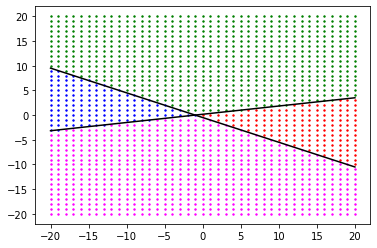

In [31]:
plt.scatter(X1grid[indx00], X2grid[indx00], 2, color='blue')
plt.scatter(X1grid[indx11], X2grid[indx11], 2, color='red')
plt.scatter(X1grid[indx01], X2grid[indx01], 2, color='green')
plt.scatter(X1grid[indx10], X2grid[indx10], 2, color='magenta')
plt.plot(x1,-(1+x1)/2, color='black')
plt.plot(x1, (1+x1)/6, color='black')

```
X1grid = X1grid.flatten()
X2grid = X2grid.flatten()

indx0 = (y[0,:] < 0.5)
indx0= indx0.flatten()
indx1 = (y[1,:] < 0.5)
indx1= indx1.flatten()
indx = np.logical_and( indx0, indx1)
plt.scatter(X1grid[indx], X2grid[indx], 2, color='blue')
indx = np.logical_and(~indx0,~indx1)
plt.scatter(X1grid[indx], X2grid[indx], 2, color='red')
indx = np.logical_and( indx0,~indx1)
plt.scatter(X1grid[indx], X2grid[indx], 2, color='green')
indx = np.logical_and(~indx0, indx1)
plt.scatter(X1grid[indx], X2grid[indx], 2, color='cyan')

#plt.scatter(X1grid[~indx0 and  indx1], X2grid[~indx0 and  indx1], color='red')
#plt.scatter(X1grid[ indx0 and ~indx1], X2grid[~indx0 and  indx1], color='green')
#plt.scatter(X1grid[~indx0 and ~indx1], X2grid[~indx0 and  indx1], color='black')

#x_vals = np.arange(-5, 5.1)
plt.plot(x1,-(1+x1)/2, color='black')
plt.plot(x1, (1+x1)/6, color='black')
```


Input

$$
\boldsymbol{x} = (x_0, x_1, \ldots, x_N)^T
$$

$$
\boldsymbol{W}\qquad\text{and}\qquad\boldsymbol{b}
$$

$$
\boldsymbol{y} = (y_0, y_1, \ldots, y_M)^T
$$

$$
\boldsymbol{y} =
\sigma(\boldsymbol{W}^T\boldsymbol{x}+\boldsymbol{b})
$$



### Artificial Neural Network

Perceptrons can be vertically stacked and **fully connected**, and 
they can also be multi-layered horizontally. 

An input signal on the left **input layer** is propagated through
the network by repeating the **weighting**, **bias** and **activation**
steps.

This is called **feeding forward**. 

Layers of stacked perceptrons between the input and output layers 
are called **hidden layers**.



The diagrams that are present in the Jupyter notebook and slides version of this document
are not included in the PDF version.

This is a simple 2-input/2-output network with no hidden layers.

<table>
<tr>
<td>
<img src="./gfx/ann_1.png" style="height:200px"/>
</td>
<td>

This is a useful notation system...

\begin{align*}
\boldsymbol{a}_0 & = \boldsymbol{x},
\\
\boldsymbol{n}_1 & = \boldsymbol{W}_1^T\boldsymbol{a}_0+\boldsymbol{b}_1,
\\
\boldsymbol{a}_1 & = \sigma_1(\boldsymbol{n_1}),
\\
\boldsymbol{y} & = \boldsymbol{a}_1.
\end{align*}
    
Note that the weight matrices are square.
    
</td>
</tr>
</table>

This is a 3-input/3-output network with one hidden layer.

<table>
<tr>
<td>
<img src="./gfx/ann_2.png" style="height:200px"/>
</td>
<td>

The notation system is now easily adjusted...

\begin{align*}
\boldsymbol{a}_0 & = \boldsymbol{x},
\\
\boldsymbol{n}_1 & = \boldsymbol{W}_1^T\boldsymbol{a}_0+\boldsymbol{b}_1,
\\
\boldsymbol{a}_1 & = \sigma_1(\boldsymbol{n_1}),
\\
\boldsymbol{n}_2 & = \boldsymbol{W}_2^T\boldsymbol{a}_1+\boldsymbol{b}_2,
\\
\boldsymbol{a}_2 & = \sigma_2(\boldsymbol{n_2}),
\\
\boldsymbol{y} & = \boldsymbol{a}_2.
\end{align*}

The weight matrices are still square.    

</td>
</tr>
</table>

This is more general network with one hidden layer.

<table>
<tr>
<td>
<img src="./gfx/ann_3.png" style="height:200px"/>
</td>
<td>

\begin{align*}
\boldsymbol{a}_0 & = \boldsymbol{x},
\\
\boldsymbol{n}_1 & = \boldsymbol{W}_1^T\boldsymbol{a}_0+\boldsymbol{b}_1,
\\
\boldsymbol{a}_1 & = \sigma_1(\boldsymbol{n_1}),
\\
\boldsymbol{n}_2 & = \boldsymbol{W}_2^T\boldsymbol{a}_1+\boldsymbol{b}_2,
\\
\boldsymbol{a}_2 & = \sigma_2(\boldsymbol{n_2}),
\\
\boldsymbol{y} & = \boldsymbol{a}_2.
\end{align*}

In this general case the weight matrices are no longer square.    

</td>
</tr>
</table>

This is a more general network with two hidden layers.

<table>
<tr>
<td>
<img src="./gfx/ann_4.png" style="height:300px"/>
</td>
<td>

\begin{align*}
\boldsymbol{a}_0 & = \boldsymbol{x},
\\
\boldsymbol{n}_1 & = \boldsymbol{W}_1^T\boldsymbol{a}_0+\boldsymbol{b}_1,
\\
\boldsymbol{a}_1 & = \sigma_1(\boldsymbol{n_1}),
\\
\boldsymbol{n}_2 & = \boldsymbol{W}_2^T\boldsymbol{a}_1+\boldsymbol{b}_2,
\\
\boldsymbol{a}_2 & = \sigma_2(\boldsymbol{n_2}),
\\
\boldsymbol{n}_3 & = \boldsymbol{W}_3^T\boldsymbol{a}_2+\boldsymbol{b}_3,
\\
\boldsymbol{a}_3 & = \sigma_3(\boldsymbol{n_3}),
\\
\boldsymbol{y} & = \boldsymbol{a}_3.
\end{align*}
</td>
</tr>
</table>


This assemblage of perceptons is called an **artificial neural network**.
It is a very crude imitation of the neuronal connections in the brain.

If the weights and biases have the 

There possibilities are **endless**, and there are also variants on
the basic scheme as discussed here. 

- Convolutional Neural Networks

- Recurrent Neural Networks

- ... And lots more! It's a vibrant field!

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def ReLU(x):
    return np.maximum(0,x)

In [ ]:
X = 0.01*np.array([[6,2,8,4,1,6]]).T
W = 0.01*np.array([[1,2],[3,4],[5,6],[1,2],[3,4],[5,6]])
b = 0.01*np.array([[.5,.6]]).T
print(X)
print(W)
print(b)

In [ ]:
n = W.T @ X + b
print(f'n = {n}')
y = sigmoid(n)
print(f'y = {y}')

In [ ]:
W = np.array([[1,2],[-6,4]])
b = 0.0*np.array([[1,2]]).T
y = np.zeros([2,N,N])
print(y.shape)
X = np.zeros([2,1])
#print(y)
#print(X)
#print(W)
#print(sigmoid(W.T @ X + b))
#print('y = ', y[:,[0,0]])
#print('y = ', y)
y[:,[0,0]] = sigmoid(W.T @ X + b)

In [ ]:
n = W.T @ X + b
print(f'n = {n}')
y = ReLU(n)
print(f'y = {y}')

```
indx0 = (y[0] < 0.5)
indx= indx.flatten()
X1grid = X1grid.flatten()
X2grid = X2grid.flatten()
plt.scatter(X1grid[indx], X2grid[indx], 2, color='red')
plt.scatter(X1grid[~indx], X2grid[~indx], 2, color='blue')
plt.plot(x_vals, y_vals, color='black')
```

```
print(f'N = {N}')
y0 = y[0,:].flatten()
y1 = y[1,:].flatten()
indx1 = y0<0.5
indx2 = y1<0.5
indx = np.logical_and(indx1, indx2).reshape(N,N)
plt.scatter(X1grid[indx], X2grid[indx], color='blue')
indx1 = y0>=0.5
indx2 = y1>=0.5
indx = np.logical_and(indx1, indx2).reshape(N,N)
plt.scatter(X1grid[indx], X2grid[indx], color='red')

indx1 = y0<0.5
indx2 = y1>=0.5
indx = np.logical_and(indx1, indx2).reshape(N,N)
plt.scatter(X1grid[indx], X2grid[indx], color='green')

indx1 = y0>=0.5
indx2 = y1<0.5
indx = np.logical_and(indx1, indx2).reshape(N,N)
plt.scatter(X1grid[indx], X2grid[indx], color='black')
```

```
plt.scatter(X1grid[y[0,:]<0.5], X2grid[y[0,:]<0.5], color='blue')
plt.scatter(X1grid[y[0,:]>=0.5],X2grid[y[0,:]>=0.5], color='red')
plt.scatter(X1grid[y[1,:]<0.5], X2grid[y[1,:]<0.5], marker='x', color='green')
plt.scatter(X1grid[y[1,:]>=0.5],X2grid[y[1,:]>=0.5], marker='x', color='black')
```

```
indx1 = y0<0.5
indx2 = y1>=0.5
indx = np.logical_and(indx1, indx2).reshape(N,N)
plt.scatter(xxx1[indx], xxx2[indx], color='green')

indx1 = y0>=0.5
indx2 = y1<0.5
indx = np.logical_and(indx1, indx2).reshape(N,N)
plt.scatter(xxx1[indx], xxx2[indx], color='black')
```

In [ ]:
# https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy
x1 = np.arange(-10, 10, 1)
x2 = np.arange(-10, 10, 1)
N = x1.shape[0]
print(N)
xx1, xx2 = np.meshgrid(x1, x2, sparse=True)
z = np.sin(xx1**2 + xx2**2) / (1+xx1**2 + xx2**2)
h = plt.contourf(x1,x2,z)
#print(xx1)
#print(xx2)

In [ ]:
xxx1 = np.matlib.repmat(xx1,N,1)
print(xxx1.shape)

In [ ]:
xxx2 = np.matlib.repmat(xx2,1,N)
print(xxx2.shape)

In [ ]:
plt.scatter(xxx1[xxx2<0],xxx2[xxx2<0], color='blue')
plt.scatter(xxx1[xxx2>=0],xxx2[xxx2>=0], color='red')

In [ ]:
W = np.array([[1,2],[-6,4]])
b = 0.0*np.array([[1,2]]).T
y = np.zeros([2,N,N])
print(y.shape)
X = np.zeros([2,1])
#print(y)
#print(X)
#print(W)
#print(sigmoid(W.T @ X + b))
#print('y = ', y[:,[0,0]])
#print('y = ', y)
y[:,[0,0]] = sigmoid(W.T @ X + b)

In [ ]:
if False:
    print(f'xx1 = {xx1}')
    print(f'xx2 = {xx2}')



In [ ]:
# Yes, these...
c = 0
for i in range(N):
    for j in range(N):
        X[0] = xx1[0,i]
        X[1] = xx2[j,0]
#        print('X=', X)
        tmp = sigmoid(W.T @ X + b)
        y[:,i,j] = tmp[:,0] 
#        print(f'tmp = {tmp}')
#        print('y=',y[:,i,j])
        c += 1

In [ ]:
#print(y)

In [ ]:
plt.scatter(xxx1[y[0,:]<0.5],xxx2[y[0,:]<0.5], color='blue')
plt.scatter(xxx1[y[0,:]>=0.5],xxx2[y[0,:]>=0.5], color='red')
plt.scatter(xxx1[y[1,:]<0.5],xxx2[y[1,:]<0.5], marker='x', color='green')
plt.scatter(xxx1[y[1,:]>=0.5],xxx2[y[1,:]>=0.5], marker='x', color='black')



In [ ]:
print(f'N = {N}')
y0 = y[0,:].flatten()
y1 = y[1,:].flatten()
indx1 = y0<0.5
indx2 = y1<0.5
indx = np.logical_and(indx1, indx2).reshape(N,N)
plt.scatter(xxx1[indx], xxx2[indx], color='blue')
indx1 = y0>=0.5
indx2 = y1>=0.5
indx = np.logical_and(indx1, indx2).reshape(N,N)
plt.scatter(xxx1[indx], xxx2[indx], color='red')

indx1 = y0<0.5
indx2 = y1>=0.5
indx = np.logical_and(indx1, indx2).reshape(N,N)
plt.scatter(xxx1[indx], xxx2[indx], color='green')

indx1 = y0>=0.5
indx2 = y1<0.5
indx = np.logical_and(indx1, indx2).reshape(N,N)
plt.scatter(xxx1[indx], xxx2[indx], color='black')



In [ ]:
#indx1 = y[0,:]<0.5 and y[1,:]<0.5
indx1 = y[0,:]<0.5
indx2 = y[1,:]<0.5
print('indx1 = ', indx1)
indxR = np.intersect1d(indx1.flatten(),indx2.flatten())
print(indxR)
plt.scatter(xxx1[indxR], xxx2[indxR], color='blue')
print(type(indx1))
#plt.scatter(xxx1[y[0,:]<0.5], xxx2[y[1,:]<0.5], color='blue')
#plt.scatter(xxx1[y[0,:]<0.5], xxx2[y[1,:]>=0.5], color='red')
#plt.scatter(xxx1[y[0,:]>=0.5],xxx2[y[1,:]<0.5], marker='x', color='green')
#plt.scatter(xxx1[y[0,:]>=0.5],xxx2[y[1,:]>=0.5], marker='x', color='black')

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
sns.get_dataset_names()
dfi = sns.load_dataset('iris')
dfi.head()

In [ ]:
sns.pairplot(dfi, hue='species', height = 1.5)

In [ ]:
# we want a binary classifier so we drop the virginica data
dfid = dfi[ (dfi['species'] != 'virginica') == True ]
sns.pairplot(dfid, hue='species', height = 1.5)

In [ ]:
dfid.head()

In [ ]:
# let's use petal length and sepal width as our features
X = dfid.iloc[:,[1,2]].values
# and species as our label
y = dfid.iloc[:, 4].values

In [ ]:
# select the setosa and versicolor feature rows
#x_set = X[y == 'setosa',:]
#x_ver = X[y == 'versicolor',:]

<https://scikit-learn.org/stable/modules/svm.html>

In [ ]:
# from the scikit-learn library we use 40% of the data to test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [ ]:
scaler = StandardScaler()
# initialise the scaler by feeding it the training data
scaler.fit(X_train)
# now carry out the transformation of all of the feauture data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# import the SVM classifier
from sklearn import svm
# instance it
svmclf = svm.SVC(kernel='linear')
# and fit the training data
svmclf.fit(X_train, y_train)

In [ ]:
# make predictions on the test set
y_pred = svmclf.predict(X_test)

In [ ]:

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
clsrep = classification_report(y_test, y_pred)
print("Classification Report:",)
print(clsrep)
accsc = accuracy_score(y_test,y_pred)
print("Accuracy:", accsc)

In [ ]:

cmplot = ConfusionMatrixDisplay(cm, display_labels=svmclf.classes_)
cmplot.plot()
plt.show()

In [ ]:
indxS = np.where(y_test == 'setosa')[0]
indxV = np.where(y_test != 'setosa')[0]
plt.figure(figsize=(8,8)); plt.gca().set_aspect('equal')
plt.scatter(X_test[indxS,0], X_test[indxS,1], color='blue')
plt.scatter(X_test[indxV,0], X_test[indxV,1], color='red')
plt.xlabel('sepal_width'); plt.ylabel('petal_length')

In [ ]:
# get support vectors
print('1=\n', svmclf.support_vectors_)
# get indices of support vectors
print('2=\n', svmclf.support_)
# get number of support vectors for each class
print('3=\n', svmclf.n_support_)


In [ ]:
# https://stackoverflow.com/questions/45894906/obtain-decision-boundary-for-svm
for (intercept, coef) in zip(svmclf.intercept_, svmclf.coef_):
    s = "y = {0:.3f}".format(intercept)
    for (i, c) in enumerate(coef):
        s += " + {0:.3f} * x{1}".format(c, i)

    print(s)

# ax0 + bx1 + c = 0
print(svmclf.intercept_[0], svmclf.coef_[0])
a = svmclf.coef_[0,0]
b = svmclf.coef_[0,1]
c = svmclf.intercept_[0]

print(f'a={a}, b={b}, c={c}')

In [ ]:
indxS = np.where(y_train == 'setosa')[0]
indxV = np.where(y_train != 'setosa')[0]
plt.figure(figsize=(8,8)); plt.gca().set_aspect('equal')
plt.scatter(X_train[indxS,0], X_train[indxS,1], color='blue')
plt.scatter(X_train[indxV,0], X_train[indxV,1], color='red')
plt.xlabel('sepal_width'); plt.ylabel('petal_length')

#for k in range(0,svmclf.n_support_[0]):
#    plt.plot([0,0], svmclf.support_vectors_[k,:], 'c')
n0=svmclf.n_support_[0]
n1=svmclf.n_support_[1]
plt.scatter(svmclf.support_vectors_[:n0,0],svmclf.support_vectors_[:n0,1], color='green', marker='d')
plt.scatter(svmclf.support_vectors_[n0:n0+n1,0],svmclf.support_vectors_[n0:n0+n1,1], color='magenta', marker='s')

P0 = np.array([-2,3]); P1=-np.array([(a*P0[0]+c)/b,(a*P0[1]+c)/b])
plt.plot(P0, P1, 'k')
cn= c+1
P0 = np.array([-2,3]); P1=-np.array([(a*P0[0]+cn)/b,(a*P0[1]+cn)/b])
plt.plot(P0, P1, 'k')
cn= c-1
P0 = np.array([-2,3]); P1=-np.array([(a*P0[0]+cn)/b,(a*P0[1]+cn)/b])
plt.plot(P0, P1, 'k')



In [ ]:
indxS = np.where(y_test == 'setosa')[0]
indxV = np.where(y_test != 'setosa')[0]
plt.figure(figsize=(8,8)); plt.gca().set_aspect('equal')
plt.scatter(X_test[indxS,0], X_test[indxS,1], color='blue')
plt.scatter(X_test[indxV,0], X_test[indxV,1], color='red')
plt.xlabel('sepal_width'); plt.ylabel('petal_length')

#for k in range(0,svmclf.n_support_[0]):
#    plt.plot([0,0], svmclf.support_vectors_[k,:], 'c')
n0=svmclf.n_support_[0]
n1=svmclf.n_support_[1]
plt.scatter(svmclf.support_vectors_[:n0,0],svmclf.support_vectors_[:n0,1], color='green', marker='d')
plt.scatter(svmclf.support_vectors_[n0:n0+n1,0],svmclf.support_vectors_[n0:n0+n1,1], color='magenta', marker='s')

P0 = np.array([-2,3]); P1=-np.array([(a*P0[0]+c)/b,(a*P0[1]+c)/b])
plt.plot(P0, P1, 'k')
cn= c+1
P0 = np.array([-2,3]); P1=-np.array([(a*P0[0]+cn)/b,(a*P0[1]+cn)/b])
plt.plot(P0, P1, 'k')
cn= c-1
P0 = np.array([-2,3]); P1=-np.array([(a*P0[0]+cn)/b,(a*P0[1]+cn)/b])
plt.plot(P0, P1, 'k')



In [ ]:
indxS = np.where(y_pred == 'setosa')[0]
indxV = np.where(y_pred != 'setosa')[0]
plt.figure(figsize=(8,8)); plt.gca().set_aspect('equal')
plt.scatter(X_test[indxS,0], X_test[indxS,1], color='blue')
plt.scatter(X_test[indxV,0], X_test[indxV,1], color='red')
plt.xlabel('sepal_width'); plt.ylabel('petal_length')

#for k in range(0,svmclf.n_support_[0]):
#    plt.plot([0,0], svmclf.support_vectors_[k,:], 'c')
n0=svmclf.n_support_[0]
n1=svmclf.n_support_[1]
plt.scatter(svmclf.support_vectors_[:n0,0],svmclf.support_vectors_[:n0,1], color='green', marker='d')
plt.scatter(svmclf.support_vectors_[n0:n0+n1,0],svmclf.support_vectors_[n0:n0+n1,1], color='magenta', marker='s')

P0 = np.array([-2,3]); P1=-np.array([(a*P0[0]+c)/b,(a*P0[1]+c)/b])
plt.plot(P0, P1, 'k')
cn= c+1
P0 = np.array([-2,3]); P1=-np.array([(a*P0[0]+cn)/b,(a*P0[1]+cn)/b])
plt.plot(P0, P1, 'k')
cn= c-1
P0 = np.array([-2,3]); P1=-np.array([(a*P0[0]+cn)/b,(a*P0[1]+cn)/b])
plt.plot(P0, P1, 'k')


### Review

We covered *just enough*, to make *progress at pace*. We looked at

- SVM
- distance
- ???????????????????????????????????????????????

Now we can look at **artificial neural networks** and **deep learning**.

<http://playground.tensorflow.org>

<https://ethics-of-ai.mooc.fi/chapter-1/1-a-guide-to-ai-ethics>


## Technical Notes, Production and Archiving

Ignore the material below. What follows is not relevant to the material being taught.

#### Production Workflow

- Finalise the notebook material above
- Clear and fresh run of entire notebook
- Create html slide show:
  - `jupyter nbconvert --to slides 13_percep.ipynb `
- Set `OUTPUTTING=1` below
- Comment out the display of web-sourced diagrams
- Clear and fresh run of entire notebook
- Comment back in the display of web-sourced diagrams
- Clear all cell output
- Set `OUTPUTTING=0` below
- Save
- git add, commit and push to FML
- copy PDF, HTML etc to web site
  - git add, commit and push
- rebuild binder

Some of this originated from

<https://stackoverflow.com/questions/38540326/save-html-of-a-jupyter-notebook-from-within-the-notebook>

These lines create a back up of the notebook. They can be ignored.

At some point this is better as a bash script outside of the notebook

In [ ]:
%%bash
NBROOTNAME=13_percep
OUTPUTTING=1

if [ $OUTPUTTING -eq 1 ]; then
  jupyter nbconvert --to html $NBROOTNAME.ipynb
  cp $NBROOTNAME.html ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.html
  mv -f $NBROOTNAME.html ./formats/html/

  jupyter nbconvert --to pdf $NBROOTNAME.ipynb
  cp $NBROOTNAME.pdf ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.pdf
  mv -f $NBROOTNAME.pdf ./formats/pdf/

  jupyter nbconvert --to script $NBROOTNAME.ipynb
  cp $NBROOTNAME.py ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.py
  mv -f $NBROOTNAME.py ./formats/py/
else
  echo 'Not Generating html, pdf and py output versions'
fi